# Cubic? NVAR Temporal Subsampling

In [1]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import seaborn as sns

from sqgtools import XSQGTurb

In [2]:
sys.path.append("..")
from rcgfd import NVARDataset, BigPlot, plot_ke_relerr

In [3]:
plt.style.use("./rc-gfd.mplstyle")

In [4]:
fig_dir = "../figures"
if not os.path.isdir(fig_dir):
    os.makedirs(fig_dir)

In [8]:
class CNVARDataset(NVARDataset):
    def get_results_path(self, n_lag, n_sub):
        dt0 = 300
        delta_t = n_sub * dt0
        main_dir = f"lag{n_lag:02d}-order03-no{self.n_overlap:02d}/validation-{delta_t:04d}dt-{self.n_samples:03d}samples"
        fname = f"/contrib/Tim.Smith/qgrc-teachers/sqg/resolution/nvar-temporal-sampling-064n/{main_dir}/results.zarr"
        return main_dir, fname

In [9]:
nvd = CNVARDataset(
    n_sub=(1,4,16),
    n_lag=(0,1,2)
)

In [10]:
ds = nvd()

Grab one sample for some plotting

In [17]:
xds = ds.sel(n_lag=0, n_sub=[1,4,16], sample=2)

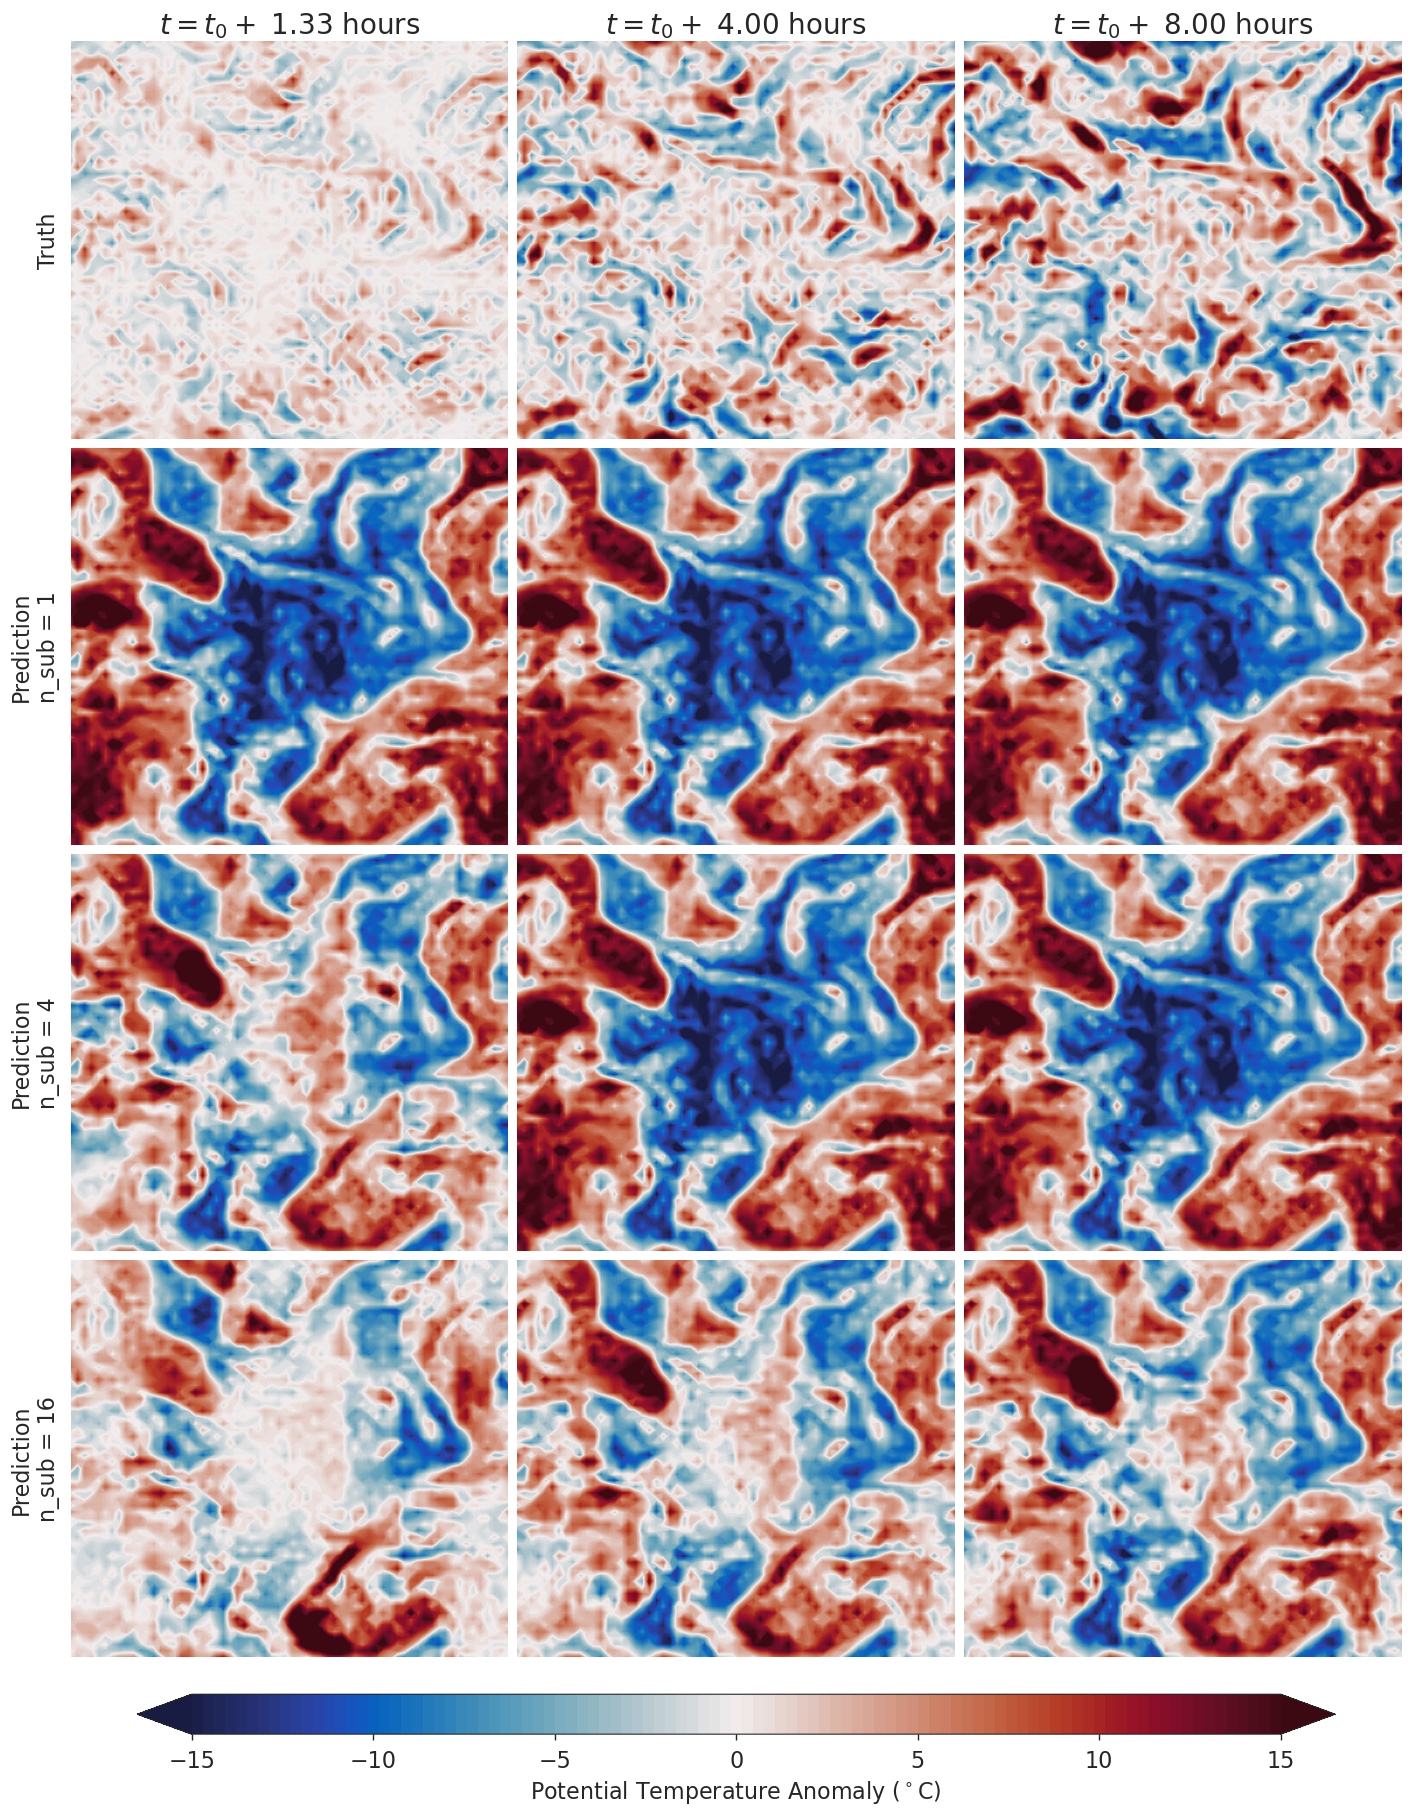

In [18]:
bp = BigPlot()
fig, axs = bp(xds)
#fig.savefig(f"{fig_dir}/nvar_big_plot.jpg", dpi=300, bbox_inches="tight")

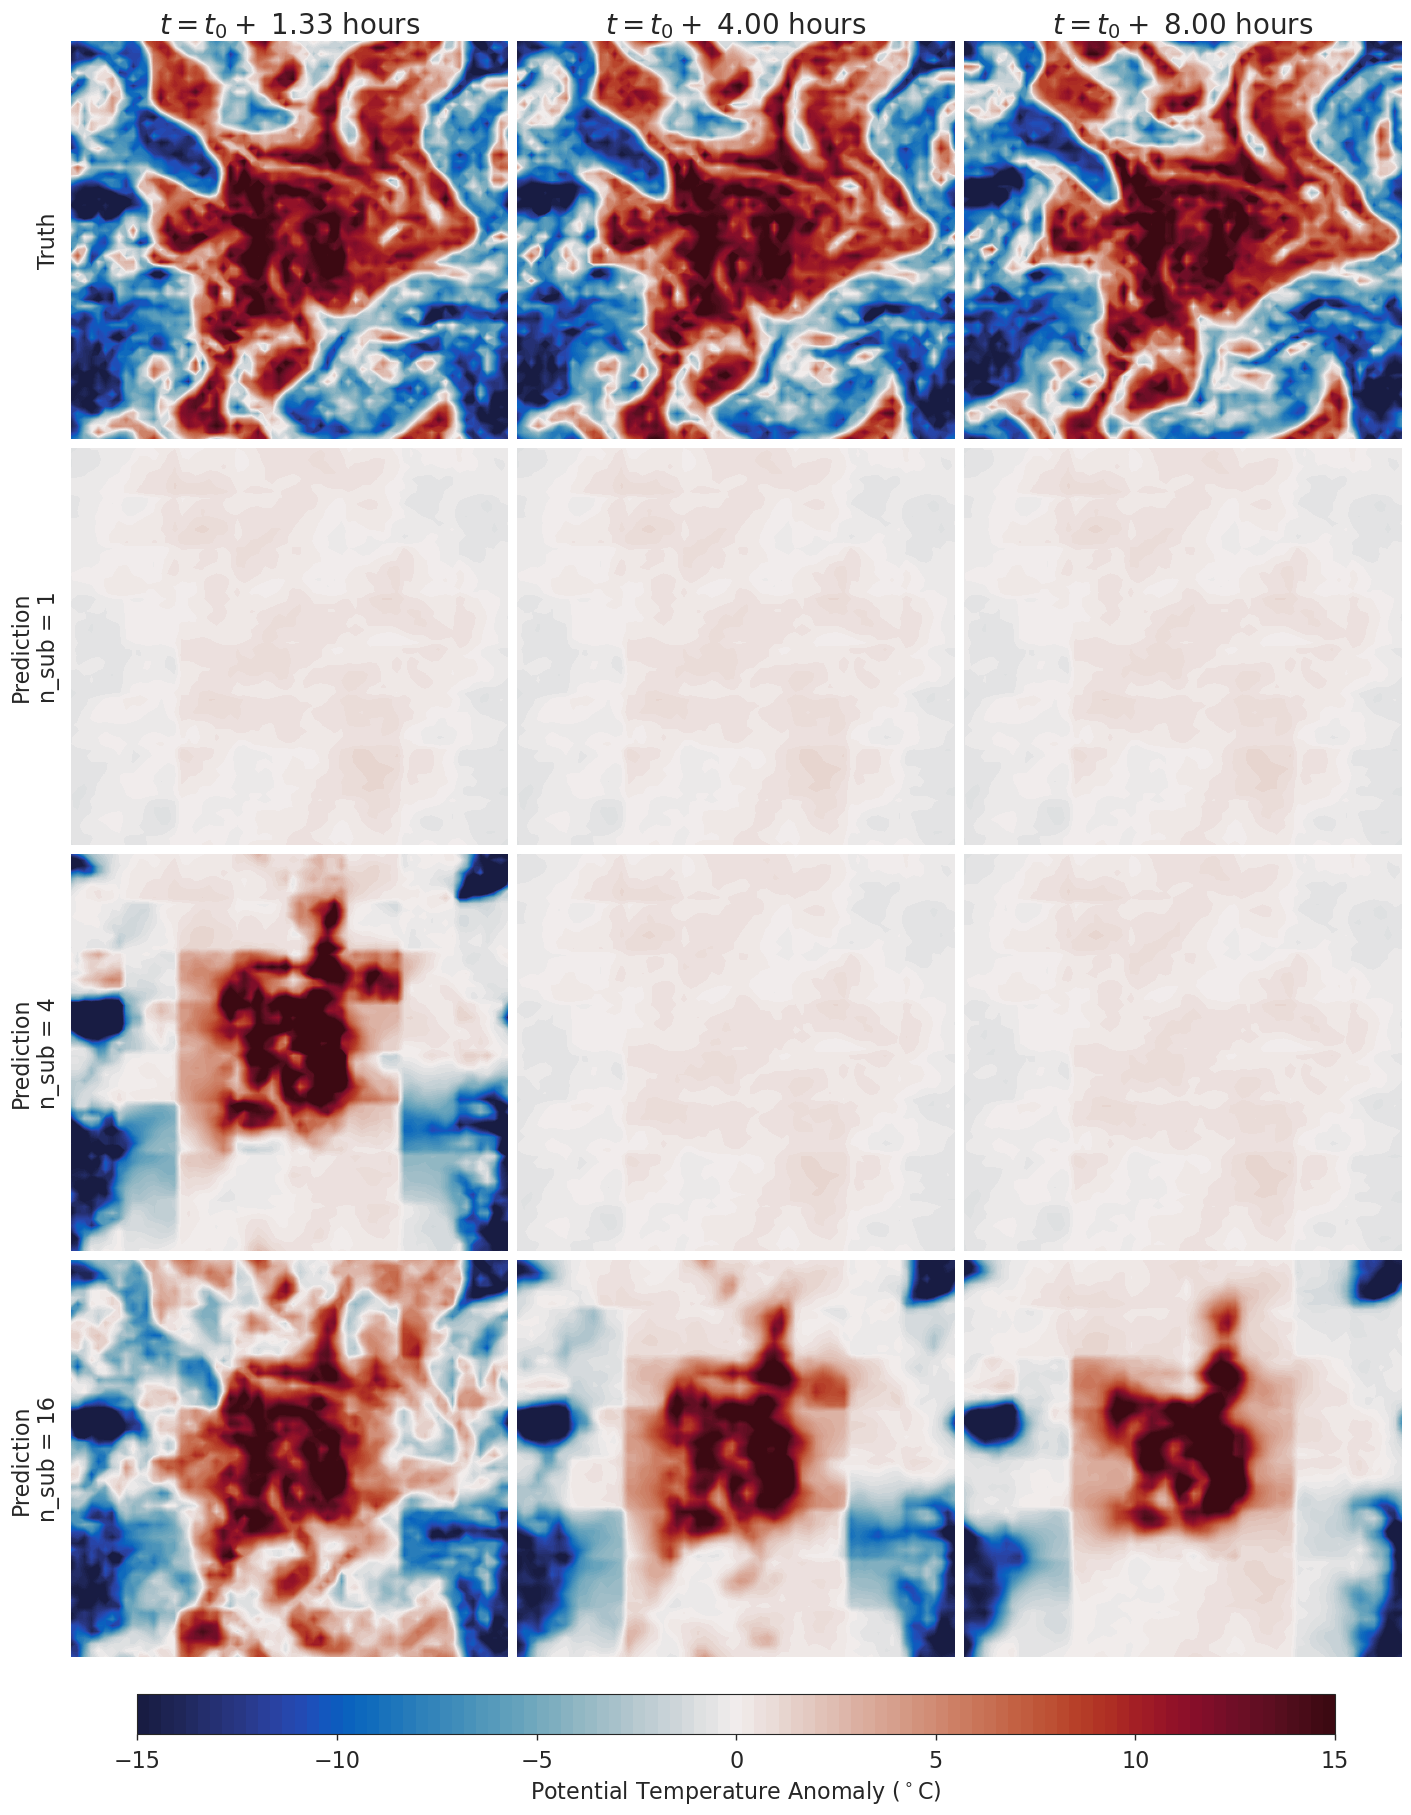

In [19]:
bp = BigPlot(diff_t0=False)
fig, axs = bp(xds)